

# **Predicting Airline Customer Satisfaction**
## Phase 1: Data Preparation & Visualisation


<center> Names & IDs of group members </center> 

Names  | IDs
------------- | -------------
Matthew Bentham  | S3923076
John Murrowood  | S3923075
Isxaq Warsame  |  S3658179



__________

### Table of contents:
- [Introduction](#intro)
   - [Data source](#ds)
   - [Dataset detail](#dd)
   - [Dataset features](#df)
   - [Target Feature](#tf)
- [Goals & Objectives](#gao) 
- [Data Cleaning & Preprocessing](#dprep)
- [Data Exploration & Visualisation](#dvis)
- [Literature Review](#lr)
- [Summary & Conclusions](#sum)
- [References](#ref)


### INTRODUCTION <a name="intro"></a>

#### **Data source:** <a name="ds"></a>

The US airline passenger satisfaction survey dataset was sourced from kaggle, uploaded by John D 2018. This dataset contains survey results for whether a customer was satisfied with the flight or not as well as passenger and flight information. The dataset also contains information on what parts of the flight service they were satisfied with or not satisifed with.

URL: [US Airline Passenger Satisfaction](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction)

#### **Dataset details:** <a name="dd"></a>

This dataset contains information on whether customers were satisfied or not during there domestic flight within the USA. There is personal details of each traveller including age, gender, type of travel (personal or buisness), as well as information on the flight including in-flight duration, gate departure and if the flight was delayed. There is also a rating for which cutomers enjoyed certain aspects of the flight such as inflight wifi, cleanliness, leg room and other things. These features will then be used for a classification problem to predict the target feature of whether a customer will be satisfied or not.

The dataset has 24 features, split into descriptive features and survey response features, including the target feature and 129,880 observations before any pre processing is preformed on the dataset.

##### **Dataset Retieval**
- The data was downloaded from kaggle as a xlsx file. Link: [US Airline Passenger Satisfaction](https://www.kaggle.com/datasets/johndddddd/customer-satisfaction) 
- As the data file is in the same github directory as this report 'satisfaction.xlsx' can be read directly 
- The first 10 rows are displayed 

In [3]:
# Reading in required packages, and setting up warnings filter
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate



df_name  = 'satisfaction.xlsx'
df = pd.read_excel(df_name)
df.head(10)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,100744,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,32838,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,32864,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,53786,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,7243,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,...,2,2,2,4,5,3,4,2,30,26.0




#### **Dataset features:** <a name="df"></a>



The 24 input Descriptive features: 
- **Age**:  The actual age of the passengers 
- **ID**:   Passenger id unique ID number
- **Gender**:   Gender of the passengers (Female, Male)
- **Type of Travel**:   Purpose of the flight of the passengers (Personal Travel, Business Travel)
- **Class**: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- **Customer Type**: The customer type (Loyal customer, disloyal customer)
- **Flight distance**: The flight distance of this journey 
- **Flight cancelled**: Whether the Flight cancelled or not (Yes, No)
- **Departure Delay in Minutes (m)**: Minutes delayed when departure 
- **Arrival Delay in Minutes (m)**: Minutes delayed when Arrival, Int 

**Survery response features:** Satisfaction level , Int , On a scale of [0,5]
- Ordinal in nature, the meaning of the numbers is listed below and below that are the response features themselves.
- **0** being **Not Applicable**,
- **1** being **Very Dissatisfied**,
- **2** being **Dissatisfied**,
- **3** being **Neutral**,
- **4** being **Satisfied**,
- **5** being **Very Satisfied**
- **The Survey Response Features are listed below:**
  -  Inflight wifi service (0:Not Applicable;1-5)
  -  Inflight service
  -  Online boarding
  -  Ease of Online booking
  -  Inflight entertainment
  -  Food and drink
  -  Seat comfort
  -  On-board service
  -  Leg room service
  -  Departure/Arrival time
  -  Baggage handling
  -  Gate location
  -  Cleanliness
  -  Check-in service


In [4]:
# Creating table of features
table = [['Name','Data Type','Units','Description'],
         ['Age', 'Numeric', 'Integer','The actual age of the passengers'],
         ['ID', 'Nominal', 'Integer', 'Passenger identifier, unique ID number'],
         ['Gender', 'Binary', 'Male or Female', 'Gender of the passengers (Female, Male)'],
         ['Type of Travel', 'Nominal Categorical', 'Personal or Business', 'Purpose of the flight of the passengers (Personal Travel, Business Travel)'],
         ['Class', 'Nominal Categorical', 'Business, Eco or Eco Plus', 'Travel class in the plane of the passengers (Business, Eco, Eco Plus)' ],
         ['Customer Type', 'Nominal Categorical', 'Loyal Customer or Disloyal Customer', 'The type of customer and how loyal they are to the airline'],
         ['Flight Distance','Numeric', 'Integer, Km', 'The flight distance of the journey in Kilometers (km)' ],
         ['Flight Cancelled', 'Nominal Categorical', 'Boolean, Yes or No', ' Whether the Flight was cancelled or not (yes or no)'  ],
         ['Departure Delay', 'Numeric', 'Integer, Minutes', 'Minutes delayed at departure, e.g, Delay in minutes before aircraft takes-off ' ],
         ['Arrival Delay', 'Numeric', 'Integer, Minutes', 'Minutes Delayed at arrival, e.g, Delay in minutes before aircraft lands']
         ]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤═════════════════════╤═════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════╕
│ Name             │ Data Type           │ Units                               │ Description                                                                   │
╞══════════════════╪═════════════════════╪═════════════════════════════════════╪═══════════════════════════════════════════════════════════════════════════════╡
│ Age              │ Numeric             │ Integer                             │ The actual age of the passengers                                              │
├──────────────────┼─────────────────────┼─────────────────────────────────────┼───────────────────────────────────────────────────────────────────────────────┤
│ ID               │ Nominal             │ Integer                             │ Passenger identifier, unique ID number                                        │
├──────────────────┼──────────────



#### **Target Feature:** <a name="tf"></a>

- 'satisfied' : The airline customer was satisfied with their cumulative experience.
- 'neutral or dissastisfied: The airline customer was NOT satisfied with their cumulative experience.


The target feature for this project is the satisfaction level of the airline customers , meaning the supervised learning task contain a binary target that defines whether or not an airline customer is satsified (Satisfied , neutral/dissatisfied) based off the descriptive variables.




### Goals & Objectives: <a name="gao"></a>

The airline industry is extremely competetive with lots of various running costs and often very fine profit margins. Therefore, these airline surveys are important as they can be used to generate models that are able to predict what the most important features of an airlines service are. Once the significant features are determined they can be used to ascertain what is important to passenger. This allows an airline to priotise spending into specific sectors of thier buisness and ensures they are able to offer the best service that is tailored the largest number of people and which parts of ther service offering they can cut down costs on while ensuring minimal impact on customer satisfaction.

*The Main objectives of this project are as follows:*
1. Identify the features that act as the best predictors for customer satisfaction in airlines. 
2. Subsequently, identify which features can be cut down on to increase profit margins.
3. Predict whether a customer is satisfied with thier airline experience based on basic customer features and survey response awnsers.




### Data Cleaning & Preprocessing: <a name="dprep"></a>


##### Data Cleaning Steps: <a name = "prepsteps"></a>
- Check datatypes and data quality issues 
- Check for outliers and missing values 
- Remove redundant features
- Rename columns
- Randomly sample data 

In [5]:
# CHECK COLUMN NAMES
df.columns


Index(['id', 'satisfaction_v2', 'Gender', 'Customer Type', 'Age',
       'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

The column containing the target feature (satissfaction) is named irregularly , additionally the id column is a redunant fetaure as it is purely used to uniquely identify passenegers and therefore has no use in a machine learning dataset.

In [6]:
# reorder columns so target feature is at the end 
df=df.rename(columns={'satisfaction_v2':'Satisfaction'})
new_cols = ['id', 'Gender', 'Customer Type', 'Age',
            'Type of Travel', 'Class', 'Flight Distance', 'Seat comfort',
            'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
            'Inflight wifi service', 'Inflight entertainment', 'Online support',
            'Ease of Online booking', 'On-board service', 'Leg room service',
            'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
            'Departure Delay in Minutes', 'Arrival Delay in Minutes','Satisfaction']
#rename columns + remove redunant column
df=df.reindex(columns=new_cols)

airplane_df = df.drop(columns=["id"])

Check data types:

In [7]:
print(airplane_df.dtypes)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Satisfacti

As the departure delay in minutes is a continuous variable, the corresponding datatype should be float. Otherwise all remaining features have the correct corresponding datatype.

In [8]:
# Changing data type of 'Depature Delay in Minutes from int to float
airplane_df['Departure Delay in Minutes'] = airplane_df['Departure Delay in Minutes'].astype(float)
print(airplane_df.dtypes)

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Satisfacti

To avoid future discrepancies , the unique values for each categorical feature is displayed to check for whitespaces , case errors ect. 

In [9]:

Objectdata = airplane_df.columns[airplane_df.dtypes==object].tolist()
print('Variable','|'.center(15), 'Unique values')
print('----------------------------------------')
for x in Objectdata:
    print(x,'|'.rjust(16-len(x)),airplane_df[x].unique())
    
    

Variable        |        Unique values
----------------------------------------
Gender          | ['Female' 'Male']
Customer Type   | ['Loyal Customer' 'disloyal Customer']
Type of Travel  | ['Personal Travel' 'Business travel']
Class           | ['Eco' 'Business' 'Eco Plus']
Satisfaction    | ['satisfied' 'neutral or dissatisfied']


As seen above no discrepancies were found in the categorical data features.

missing values are displayed: as 393 rows only account for 0.3% of the data it can be removed without causing any substantial impact to the overall dataset 

In [10]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
airplane_df = airplane_df.dropna()  # Dropping Missing Values
print(airplane_df.isnull().sum())   # Verifying they have been removed



Number of missing values for each column/ feature:
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Satisfaction                         0
dtype: int64


In order to check for outliers in the numeric data , the summary statistics for each is displayed

In [11]:
airplane_df.describe(include= ['int64', 'float64'], percentiles = [.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,59.0,64.0,70.00,85.0
Flight Distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,3399.0,3830.0,4819.14,6951.0
Seat comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Departure/Arrival time convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Food and drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Gate location,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Inflight wifi service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0,5.0,5.00,5.0
Inflight entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0,5.0,5.00,5.0
Online support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0,5.0,5.00,5.0
Ease of Online booking,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0,5.0,5.00,5.0


- Above, it is evident that there are outliers in the Flight Distance, Departure Delay in Minutes and Arrival Delay in Minutes.
- Although under normal circumstances these might not be removed, as these features are important in being able to ascertain which features contribute most to satisfaction
- However, higher delay times might lead to passengers disregarding the other features and soley basing their disatisfaction on the length of the delay.
- The only exception to this is flight distance. By keeping the outliers in flight distance we might be able to see a greater divide in what provides satisfaction to passengers as they are on the aircraft for longer.
- For this reason, only the outliers in Departure and Arrival delay will be removed.
- They will be removed using z score, any value more than 3 standard deviations (99.97%) away from the mean will be removed, for both the upper and lower bounds.

In [12]:

df = airplane_df.copy() # Copying df
standard_deviations = 3    # Setting how many std away from the mean we want to remove

# calculating the z score and then finding the absoloute value and then removing if more than 3 std away from mean
df = df[df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].apply(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations).all(axis=1)]   



In [13]:
# Confirming the outlier removal has taken place
df[['Arrival Delay in Minutes', 'Departure Delay in Minutes']].describe(include= ['int64', 'float64'], percentiles = [.25, .5, .75, .9, .95, .99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Arrival Delay in Minutes,126446.0,10.658534,21.242690,0.0,0.0,0.0,11.0,37.0,59.0,102.0,130.0
Departure Delay in Minutes,126446.0,10.317614,20.974479,0.0,0.0,0.0,10.0,36.0,58.0,101.0,128.0


In [14]:
print(f'Dataframe shape before outlier removal: {airplane_df.shape}')
print(f'Dataframe shape after outlier removal: {df.shape}')
print(f'Number of rows contianing outliers removed: {airplane_df.shape[0] - df.shape[0]}')
airplane_df = df.copy()     # Changing back to airplane_df name

Dataframe shape before outlier removal: (129487, 23)
Dataframe shape after outlier removal: (126446, 23)
Number of rows contianing outliers removed: 3041


- As the data contains more than 5000 rows , in order to simplfy the dataset to make it less compuatationally intensive , 5000 randomly sampled rows are generated.

In [15]:
airplane_df = airplane_df.sample(n=5000, random_state=111)
print(f'Number of rows in df: {airplane_df.shape[0]}')  
print(f'Number of cols in df: {airplane_df.shape[1]}')
airplane_df.sample(10, random_state=111)

Number of rows in df: 5000
Number of cols in df: 23


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
36000,Female,Loyal Customer,34,Personal Travel,Eco,1680,4,4,4,4,...,5,4,2,5,4,4,5,0.0,0.0,satisfied
52217,Female,disloyal Customer,37,Business travel,Eco,1511,3,3,2,4,...,3,1,2,3,2,4,3,15.0,7.0,neutral or dissatisfied
67955,Female,Loyal Customer,8,Business travel,Business,3950,1,2,3,2,...,4,4,4,4,1,2,1,0.0,12.0,neutral or dissatisfied
23828,Female,Loyal Customer,25,Personal Travel,Eco,1778,2,2,2,2,...,5,5,5,5,4,5,5,51.0,46.0,satisfied
54791,Male,disloyal Customer,37,Business travel,Business,2797,3,3,3,4,...,3,5,4,5,4,5,3,0.0,0.0,neutral or dissatisfied
86526,Female,Loyal Customer,40,Business travel,Business,393,1,1,5,1,...,3,3,3,3,3,3,5,0.0,0.0,satisfied
92058,Male,Loyal Customer,34,Business travel,Business,394,2,2,2,2,...,4,4,4,4,3,4,4,78.0,75.0,satisfied
112345,Female,Loyal Customer,43,Business travel,Business,678,5,5,5,5,...,4,4,5,4,5,4,3,3.0,0.0,satisfied
37930,Male,Loyal Customer,50,Personal Travel,Eco,1910,4,5,4,4,...,1,4,5,1,3,2,1,0.0,0.0,neutral or dissatisfied
49297,Male,disloyal Customer,27,Business travel,Eco,1718,2,3,2,2,...,5,4,5,2,3,3,5,0.0,0.0,neutral or dissatisfied


<span style='font-family:"Times New Roman"'> 

### Data Exploration & Visualisation: <a name="dvis"></a>
<span styel=''>

## Plotting Requirements for Phase 1

The minimum number of different plots you need to include in your Phase 1 report for the data exploration & visualisation part as follows:

    - A group of 3 members: at least 4 plots of each one of the following: one-variable plot two-variable plots, and three-variable plots (that is, minimum 4*3=12 plots in total)

## Additional plotting instructions are as follows

1. For plotting, you a  re free to use whatever Python module you like: Matplotlib, Seaborn, Altair, Plotly, etc.
2. Your plots must be meaningful and they need to make sense with respect to the goals and objectives of your project.
3. As long as your plots are meaningful and relevant, there are no restrictions on the plot types. That is, you can have a mix of box-plots, histograms, line plots, scatter plots etc.
4. For each plot in your report, you will need to label the x- and y-axes as appropriate and also add a meaningful title.

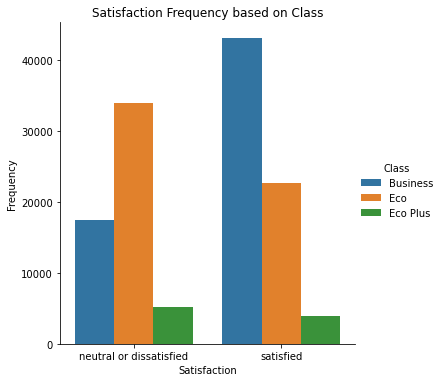

In [16]:
count = df.groupby(["Class", "Satisfaction"]).size().reset_index(name="Frequency")
sns.catplot(x = "Satisfaction", y = "Frequency",  hue= "Class", kind="bar", data=count,).set(title='Satisfaction Frequency based on Class') 

- Passengers travelling in Buisness Class are more likely to be satisfied
- Conversely, passengers travelling in economy are more likely to be neutral or dissatisfied
- Passengers in economy plus are evenly split between satisfied or not

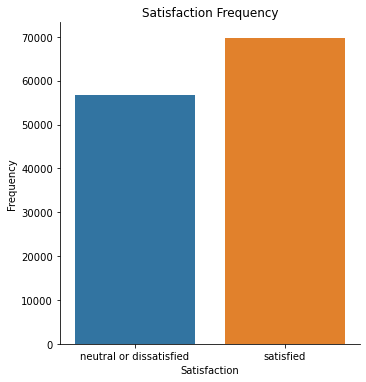

In [24]:
count = df.groupby(["Satisfaction"]).size().reset_index(name="Frequency")
sns.catplot(x = "Satisfaction", y = "Frequency", kind="bar", data=count,).set(title='Satisfaction Frequency')

- There is a roughly even split between satisfied and neutral or disatisfied
- There is 13146 more satisfied survey respondants than not satisfied

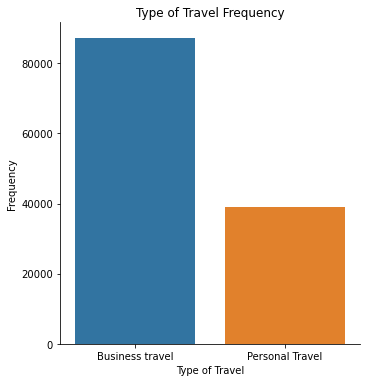

In [18]:
count = df.groupby(["Type of Travel"]).size().reset_index(name="Frequency")
sns.catplot(x = "Type of Travel", y = "Frequency", kind="bar", data=count,).set(title='Type of Travel Frequency')

- There is almost double the amount of passengers travelling for buisness than those who are travelling for personal reasons

[Text(0.5, 1.0, 'Flight Distance Histogram'),
 Text(0.5, 0, 'Flight Distance (km)'),
 Text(0, 0.5, 'Frequency')]

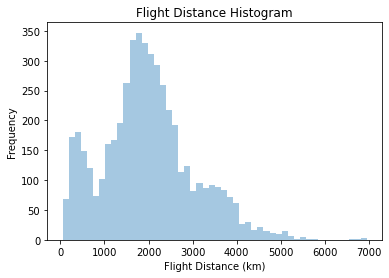

In [19]:
sns.distplot(airplane_df["Flight Distance"],kde = False).set(title = "Flight Distance Histogram", xlabel="Flight Distance (km)", ylabel="Frequency")

- The histogram shows most of the flights around 2000km in distance 
- Histogram is right skewed with the majority flights less than 3000km flight distance
- There is a local maximum of flights around 500km in length

[Text(0.5, 1.0, 'Passenger Age histogram'),
 Text(0.5, 0, 'Age (years)'),
 Text(0, 0.5, 'Frequency')]

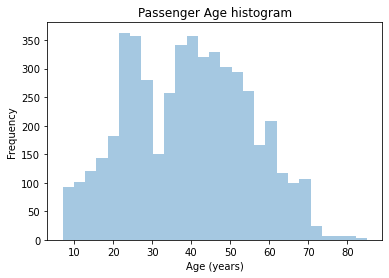

In [20]:
sns.distplot(airplane_df["Age"],kde = False).set(title = "Passenger Age histogram", xlabel="Age (years)", ylabel="Frequency")

- This is a bimodal histogram with the majority of passengers between 20 and 30 years old or around 40 years old
- The histogram shows roughly symetrical distribution of age amoung the passengers

<span style='font-family:"Times New Roman"'> 

### Literature Review: <a name="lr"></a>
<span styel=''>

### Links for use in review, reference later.
- [A multiple criteria approach for airline passenger satisfaction measurement and service quality improvement](https://www.sciencedirect.com/science/article/abs/pii/S0969699717300704)
- [The influence of airline service quality on passenger satisfaction and loyalty : The case of Uganda airline industry](https://www.emerald.com/insight/content/doi/10.1108/TQM-11-2012-0092/full/html)
- [Evaluation of passenger satisfaction with service quality: A consecutive method applied to the airline industry](https://www.sciencedirect.com/science/article/abs/pii/S0969699719302595)
- [Role of airline food quality, price reasonableness, image, satisfaction, and attachment in building re-flying intention](https://www.sciencedirect.com/science/article/abs/pii/S0278431918308235)
- [Examining nonlinear and interaction effects of multiple determinants on airline travel satisfaction](https://www.sciencedirect.com/science/article/abs/pii/S1361920921002558)
- [Predicting airline passenger satisfaction with classification algorithms](http://ijiis.org/index.php/IJIIS/article/view/80)
- [Investigating airline passenger satisfaction: Data mining method](https://www.sciencedirect.com/science/article/abs/pii/S2210539521001097)
- [A Qualitative Assessment of Airline Passenger Satisfaction](https://commons.erau.edu/student-works/166/)
- [The Impact of Service Quality on Passenger Satisfaction and Loyalty in the Indian Aviation Industry](https://www.researchgate.net/publication/350782069_The_Impact_of_Service_Quality_on_Passenger_Satisfaction_and_Loyalty_in_the_Indian_Aviation_Industry)
- [ www.jbrmr.com  A Journal of the Academy of Business and Retail Management (ABRM) 160  How customer relationship management, perceived risk, perceived service quality, and passenger trust affect a full-service airline’s passenger satisfaction ](https://www.jbrmr.com/cdn/article_file/2019-04-01-10-51-46-AM.pdf)
- [The Relationship between Service Failure and Service Recovery with Airline Passenger Satisfaction](https://iopscience.iop.org/article/10.1088/1742-6596/1529/2/022062/meta)
- [The Impact of Service Quality on Passenger Satisfaction in Airport Services: A Case on International Passengers](https://www.researchgate.net/profile/A-C-Karunaratna/publication/346676672_The_Impact_of_Service_Quality_on_Passenger_Satisfaction_in_Airport_Services_A_Case_on_International_Passengers/links/5fd05331a6fdcc697bef7b94/The-Impact-of-Service-Quality-on-Passenger-Satisfaction-in-Airport-Services-A-Case-on-International-Passengers.pdf)
- [DRIVERS OF CUSTOMER SATISFACTION IN AIRLINE INDUSTRY IN (THE) SULTANATE OF OMAN: A CONCEPTUAL STUDY](https://iris.unito.it/bitstream/2318/1758450/2/euromed2020-book-of-proceedings-2020-08-31.pdf#page=23)
- [Customer Satisfaction Evaluation of Airline Based on PLS_SEM](https://link.springer.com/chapter/10.1007/978-3-030-51556-0_99)
- [The impact of airline service quality on passengers’ behavioral intentions using passenger satisfaction as a mediator](https://www.sciencedirect.com/science/article/pii/S0969699717301874)


<span style='font-family:"Times New Roman"'> 

### Summary & conclusion: <a name="sum"></a>
<span styel=''>

<span style='font-family:"Times New Roman"'> 

### References: <a name="ref"></a>
<span styel=''>

In [21]:
"https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656082/" # Discretization    

'https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2656082/'